___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [6]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [7]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [8]:
import yfinance as yf

# Define the ticker and date range
ticker = "BAC"
start = "2020-01-01"
end = "2025-01-01"

# Download the data
BAC = yf.download(ticker, start=start, end=end)

# Show first rows
print(BAC.head())


C:\Users\NathaliaSungkoora\AppData\Local\Temp\ipykernel_7536\2456216912.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  BAC = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker            BAC        BAC        BAC        BAC       BAC
Date                                                            
2020-01-02  31.092318  31.109766  30.786979  30.839321  37614200
2020-01-03  30.446739  30.664839  30.324600  30.516529  50357900
2020-01-06  30.403116  30.446739  29.984365  30.019262  42185000
2020-01-07  30.202461  30.464180  30.123945  30.272255  34149000
2020-01-08  30.507805  30.699730  30.141395  30.158844  45311600


In [9]:
# Download stock data using yfinance
C = yf.download("C", start=start, end=end, auto_adjust=True)
GS = yf.download("GS", start=start, end=end, auto_adjust=True)
JPM = yf.download("JPM", start=start, end=end, auto_adjust=True)
MS = yf.download("MS", start=start, end=end, auto_adjust=True)
WFC = yf.download("WFC", start=start, end=end, auto_adjust=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
MS

Price,Close,High,Low,Open,Volume
Ticker,MS,MS,MS,MS,MS
Date,,,,,
2020-01-02,43.331902,43.348555,42.607480,42.632463,7808000
2020-01-03,42.632454,42.840620,42.324369,42.649108,6706000
2020-01-06,42.482571,42.499224,42.016277,42.191136,7476700
2020-01-07,42.399307,42.624127,42.224448,42.499229,4538100
2020-01-08,42.940540,43.123728,42.382656,42.432614,6185200
...,...,...,...,...,...
2024-12-24,124.351547,124.508140,121.934197,122.403969,2902800
2024-12-26,125.300873,125.437888,123.793699,123.832847,3013500


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [11]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [25]:
# Combine the first two levels into one, and keep the third level as the second
bank_stocks.columns = ['{} {}'.format(a, c) if a==b else '{} {}'.format(a,b) + ' ' + c 
                       for a,b,c in bank_stocks.columns]

# Now convert it into a MultiIndex with two levels: Bank Ticker and Stock Info
bank_stocks.columns = pd.MultiIndex.from_tuples(
    [(col.split()[0], ' '.join(col.split()[1:])) for col in bank_stocks.columns],
    names=['Bank Ticker', 'Stock Info']
)


In [26]:
bank_stocks.head()

Bank Ticker        BAC                                                      C  \
Stock Info   Close BAC   High BAC    Low BAC   Open BAC Volume BAC    Close C   
Date                                                                            
2020-01-02   31.092318  31.109766  30.786979  30.839321   37614200  65.700394   
2020-01-03   30.446739  30.664839  30.324600  30.516529   50357900  64.462914   
2020-01-06   30.403116  30.446739  29.984365  30.019262   42185000  64.260689   
2020-01-07   30.202461  30.464180  30.123945  30.272255   34149000  63.702602   
2020-01-08   30.507805  30.699730  30.141395  30.158844   45311600  64.187920   

Bank Ticker                                             ...         MS  \
Stock Info      High C      Low C     Open C  Volume C  ...   Close MS   
Date                                                    ...              
2020-01-02   65.724657  64.729807  64.810688  12728900  ...  43.331902   
2020-01-03   65.126145  64.260709  64.543800  12437400  ...  42.632454   
2020-01-06   64.341576  63.670254  63.670254  10059500  ...  42.482571   
2020-01-07   64.139365  63.678339  64.131276  10469100  ...  42.399307   
2020-01-08   64.705564  63.637922  63.710713  11292400  ...  42.940540   

Bank Ticker                                                   WFC             \
Stock Info     High MS     Low MS    Open MS Volume MS  Close WFC   High WFC   
Date                                                                           
2020-01-02   43.348555  42.607480  42.632463   7808000  46.294540  46.544316   
2020-01-03   42.840620  42.324369  42.649108   6706000  46.010296  46.182555   
2020-01-06   42.499224  42.016277  42.191136   7476700  45.734692  45.820823   
2020-01-07   42.624127  42.224448  42.499229   4538100  45.355713  45.691617   
2020-01-08   43.123728  42.382656  42.432614   6185200  45.493523  45.932784   

Bank Ticker                                   
Stock Info     Low WFC   Open WFC Volume WFC  
Date                                          
2020-01-02   46.087828  46.380668   16803100  
2020-01-03   45.562426  45.743297   15608800  
2020-01-06   45.407402  45.424629   13200300  
2020-01-07   45.192068  45.691617   13278600  
2020-01-08   45.476296  45.510749   16585600  

[5 rows x 30 columns]

** Set the column name levels (this is filled out for you):**

In [27]:
print(bank_stocks.columns)
print(bank_stocks.columns.nlevels)


MultiIndex([('BAC',  'Close BAC'),
            ('BAC',   'High BAC'),
            ('BAC',    'Low BAC'),
            ('BAC',   'Open BAC'),
            ('BAC', 'Volume BAC'),
            (  'C',    'Close C'),
            (  'C',     'High C'),
            (  'C',      'Low C'),
            (  'C',     'Open C'),
            (  'C',   'Volume C'),
            ( 'GS',   'Close GS'),
            ( 'GS',    'High GS'),
            ( 'GS',     'Low GS'),
            ( 'GS',    'Open GS'),
            ( 'GS',  'Volume GS'),
            ('JPM',  'Close JPM'),
            ('JPM',   'High JPM'),
            ('JPM',    'Low JPM'),
            ('JPM',   'Open JPM'),
            ('JPM', 'Volume JPM'),
            ( 'MS',   'Close MS'),
            ( 'MS',    'High MS'),
            ( 'MS',     'Low MS'),
            ( 'MS',    'Open MS'),
            ( 'MS',  'Volume MS'),
            ('WFC',  'Close WFC'),
            ('WFC',   'High WFC'),
            ('WFC',    'Low WFC'),
            ('WFC', 

In [28]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [30]:
bank_stocks.head()

Bank Ticker        BAC                                                      C  \
Stock Info   Close BAC   High BAC    Low BAC   Open BAC Volume BAC    Close C   
Date                                                                            
2020-01-02   31.092318  31.109766  30.786979  30.839321   37614200  65.700394   
2020-01-03   30.446739  30.664839  30.324600  30.516529   50357900  64.462914   
2020-01-06   30.403116  30.446739  29.984365  30.019262   42185000  64.260689   
2020-01-07   30.202461  30.464180  30.123945  30.272255   34149000  63.702602   
2020-01-08   30.507805  30.699730  30.141395  30.158844   45311600  64.187920   

Bank Ticker                                             ...         MS  \
Stock Info      High C      Low C     Open C  Volume C  ...   Close MS   
Date                                                    ...              
2020-01-02   65.724657  64.729807  64.810688  12728900  ...  43.331902   
2020-01-03   65.126145  64.260709  64.543800  12437400  ...  42.632454   
2020-01-06   64.341576  63.670254  63.670254  10059500  ...  42.482571   
2020-01-07   64.139365  63.678339  64.131276  10469100  ...  42.399307   
2020-01-08   64.705564  63.637922  63.710713  11292400  ...  42.940540   

Bank Ticker                                                   WFC             \
Stock Info     High MS     Low MS    Open MS Volume MS  Close WFC   High WFC   
Date                                                                           
2020-01-02   43.348555  42.607480  42.632463   7808000  46.294540  46.544316   
2020-01-03   42.840620  42.324369  42.649108   6706000  46.010296  46.182555   
2020-01-06   42.499224  42.016277  42.191136   7476700  45.734692  45.820823   
2020-01-07   42.624127  42.224448  42.499229   4538100  45.355713  45.691617   
2020-01-08   43.123728  42.382656  42.432614   6185200  45.493523  45.932784   

Bank Ticker                                   
Stock Info     Low WFC   Open WFC Volume WFC  
Date                                          
2020-01-02   46.087828  46.380668   16803100  
2020-01-03   45.562426  45.743297   15608800  
2020-01-06   45.407402  45.424629   13200300  
2020-01-07   45.192068  45.691617   13278600  
2020-01-08   45.476296  45.510749   16585600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [38]:
# Convert string column names like 'Close BAC' into tuples ('BAC', 'Close')
bank_stocks.columns = [tuple(col.split()[::-1]) for col in bank_stocks.columns]

# Now create a proper MultiIndex
bank_stocks.columns = pd.MultiIndex.from_tuples(bank_stocks.columns, names=['Bank Ticker', 'Stock Info'])


In [39]:
print(bank_stocks.columns)
type(bank_stocks.columns)  # should be MultiIndex


MultiIndex([('BAC',  'Close'),
            ('BAC',   'High'),
            ('BAC',    'Low'),
            ('BAC',   'Open'),
            ('BAC', 'Volume'),
            (  'C',  'Close'),
            (  'C',   'High'),
            (  'C',    'Low'),
            (  'C',   'Open'),
            (  'C', 'Volume'),
            ( 'GS',  'Close'),
            ( 'GS',   'High'),
            ( 'GS',    'Low'),
            ( 'GS',   'Open'),
            ( 'GS', 'Volume'),
            ('JPM',  'Close'),
            ('JPM',   'High'),
            ('JPM',    'Low'),
            ('JPM',   'Open'),
            ('JPM', 'Volume'),
            ( 'MS',  'Close'),
            ( 'MS',   'High'),
            ( 'MS',    'Low'),
            ( 'MS',   'Open'),
            ( 'MS', 'Volume'),
            ('WFC',  'Close'),
            ('WFC',   'High'),
            ('WFC',    'Low'),
            ('WFC',   'Open'),
            ('WFC', 'Volume')],
           names=['Bank Ticker', 'Stock Info'])


pandas.core.indexes.multi.MultiIndex

In [40]:
# Select only the 'Close' prices for all banks
close_prices = bank_stocks.xs('Close', level='Stock Info', axis=1)

# Get the maximum Close price for each bank
max_close = close_prices.max()

print(max_close)


Bank Ticker
BAC     46.931259
C       70.963501
GS     599.593323
JPM    246.293076
MS     132.112518
WFC     76.102943
dtype: float64


Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [41]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [42]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.020763,-0.018835,-0.011693,-0.013196,-0.016142,-0.006140
2020-01-06,-0.001433,-0.003137,0.010234,-0.000795,-0.003516,-0.005990
2020-01-07,-0.006600,-0.008685,0.006583,-0.017001,-0.001960,-0.008286
2020-01-08,0.010110,0.007618,0.009639,0.007801,0.012765,0.003038


,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

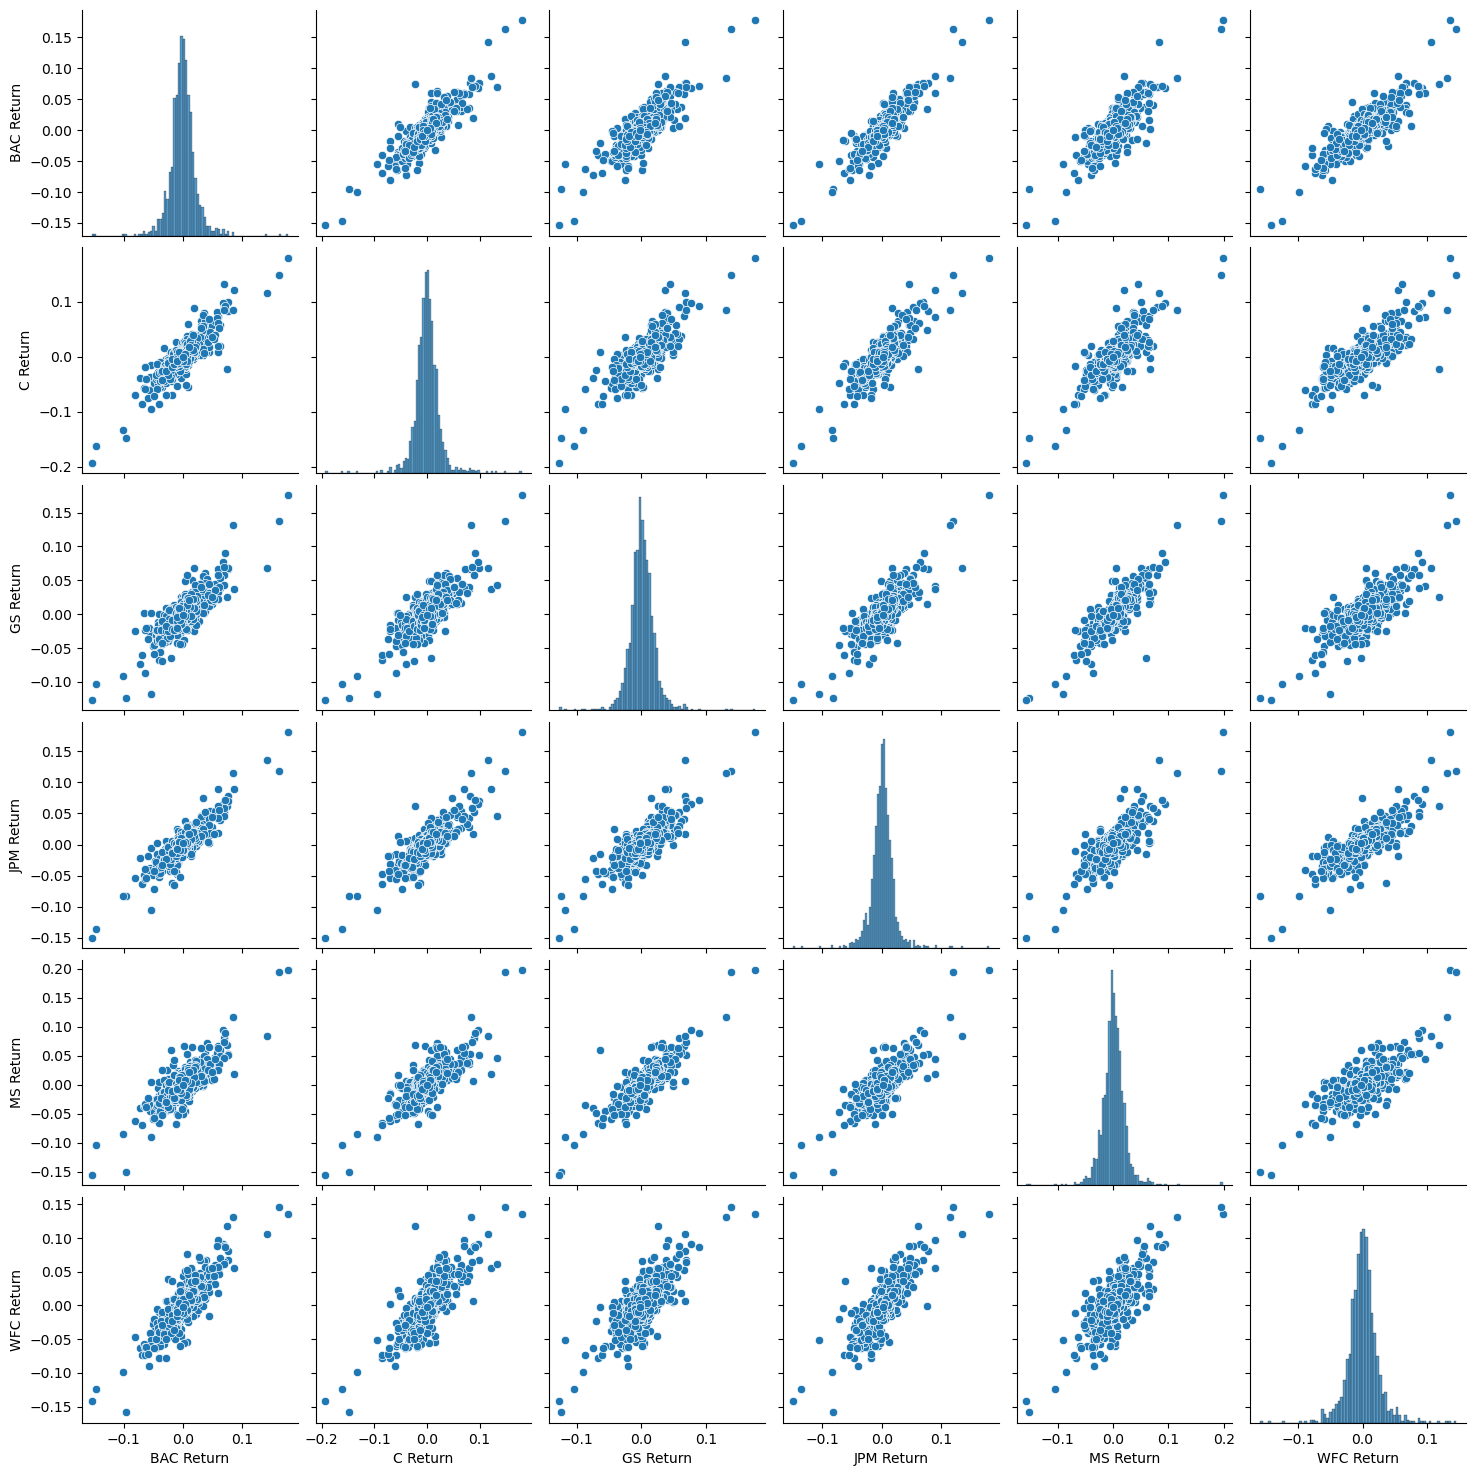

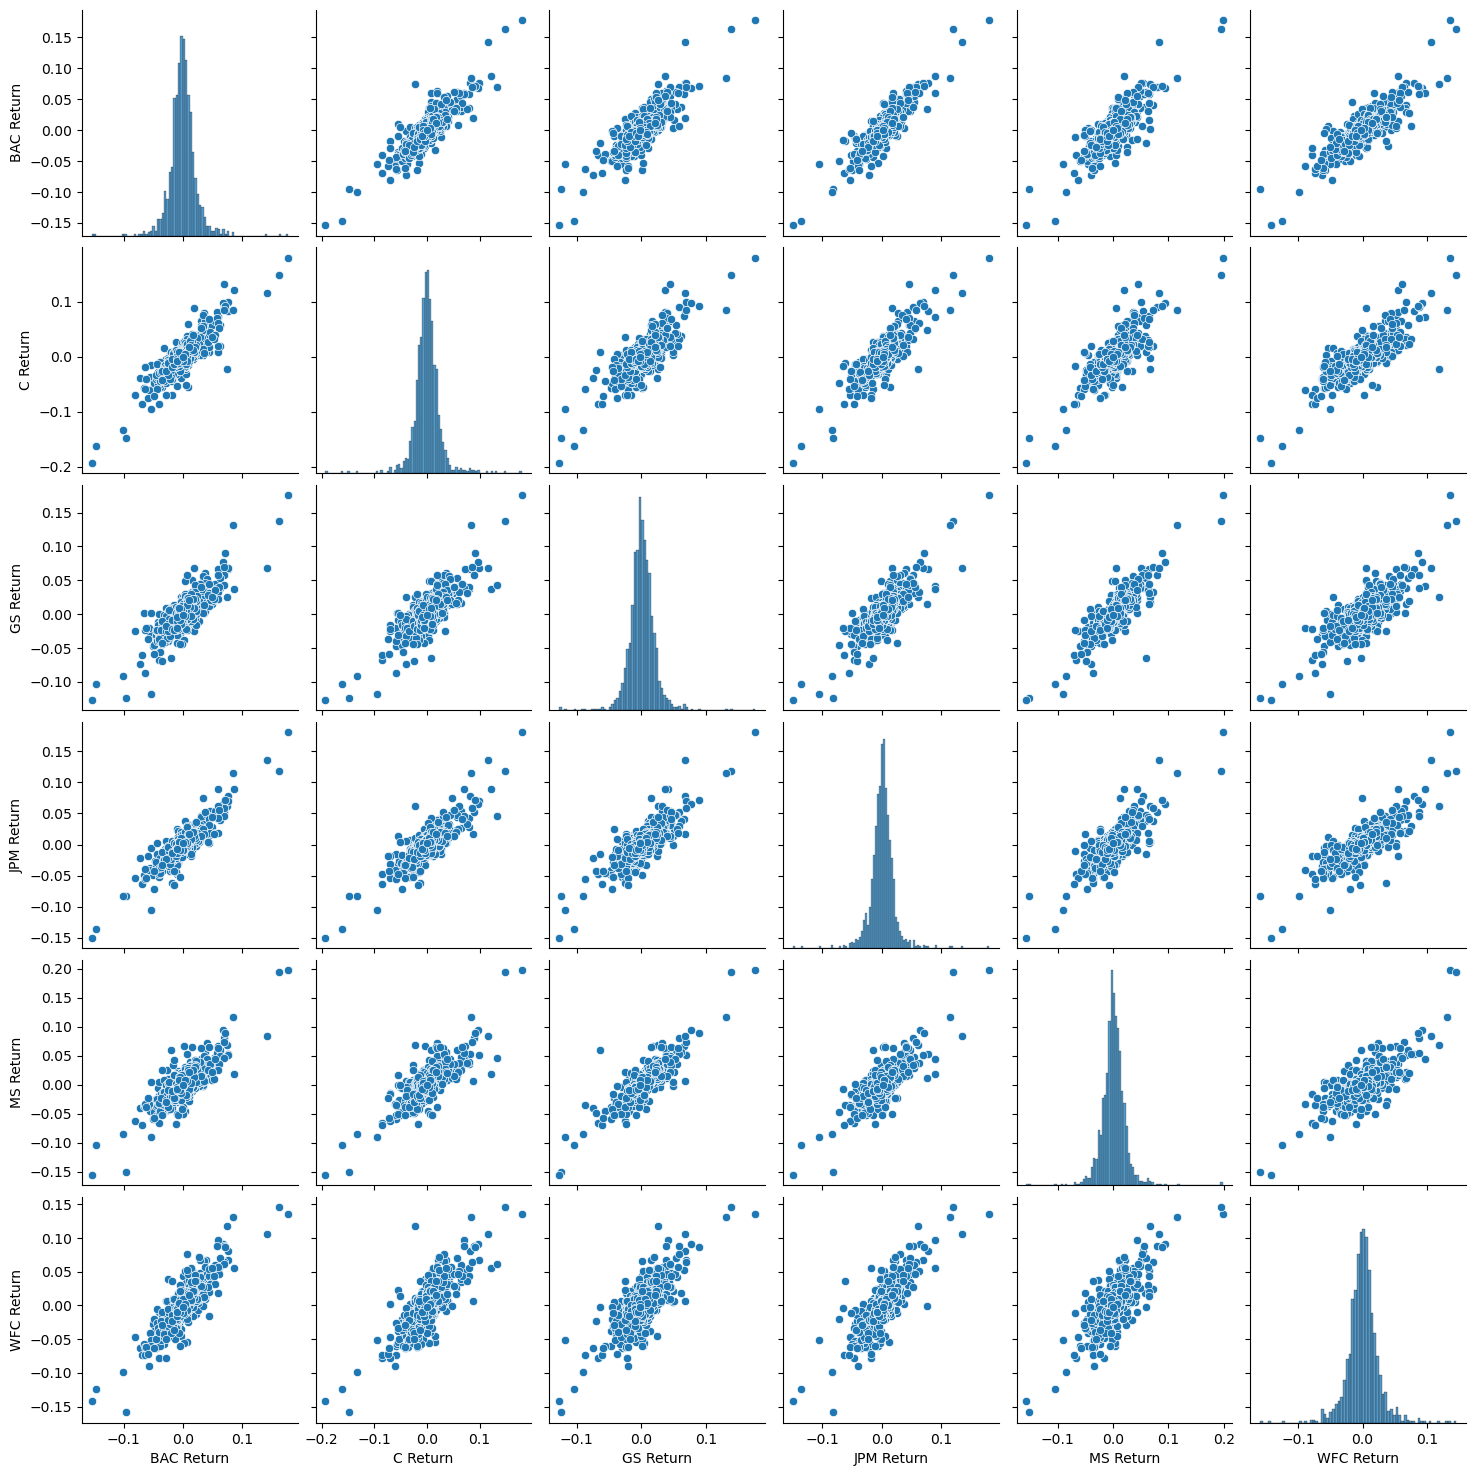

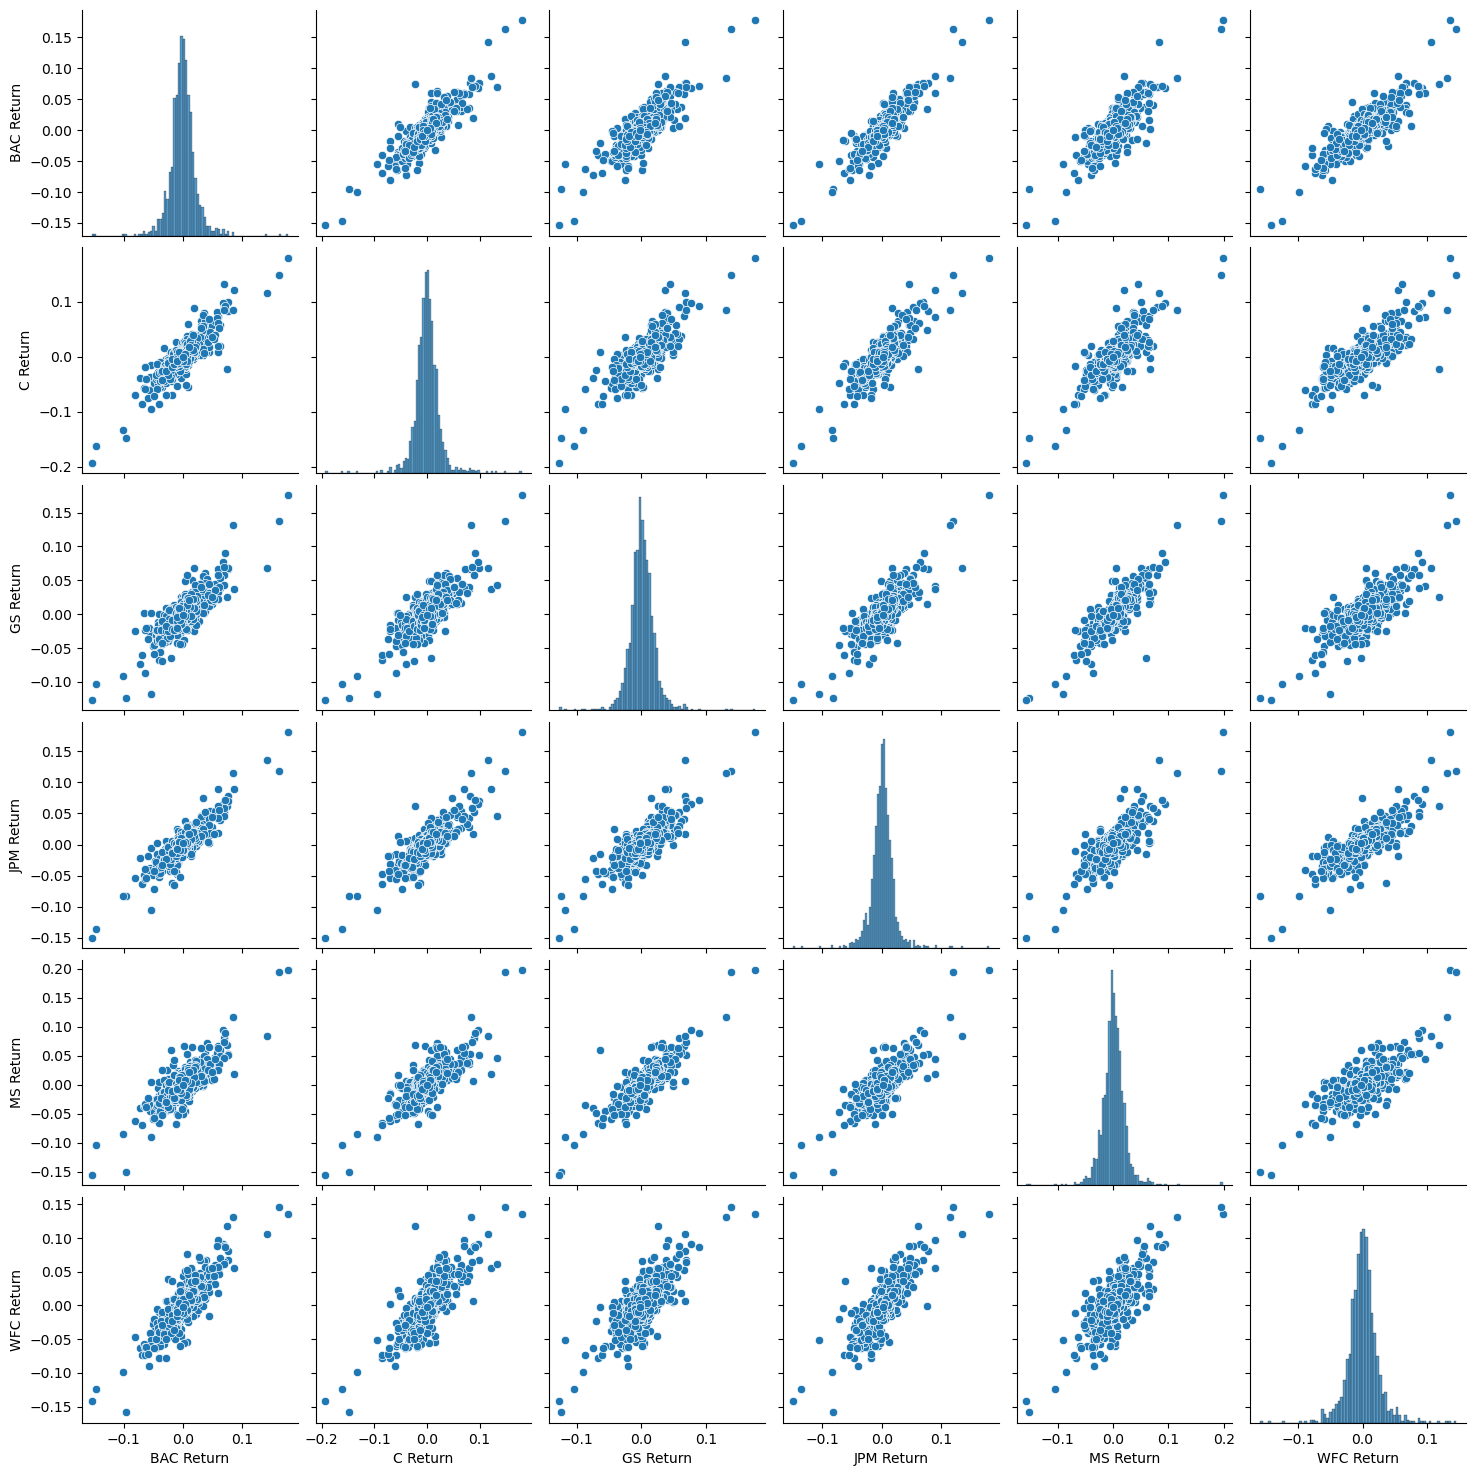

In [45]:
#returns[1:]
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(returns[1:])
plt.show()

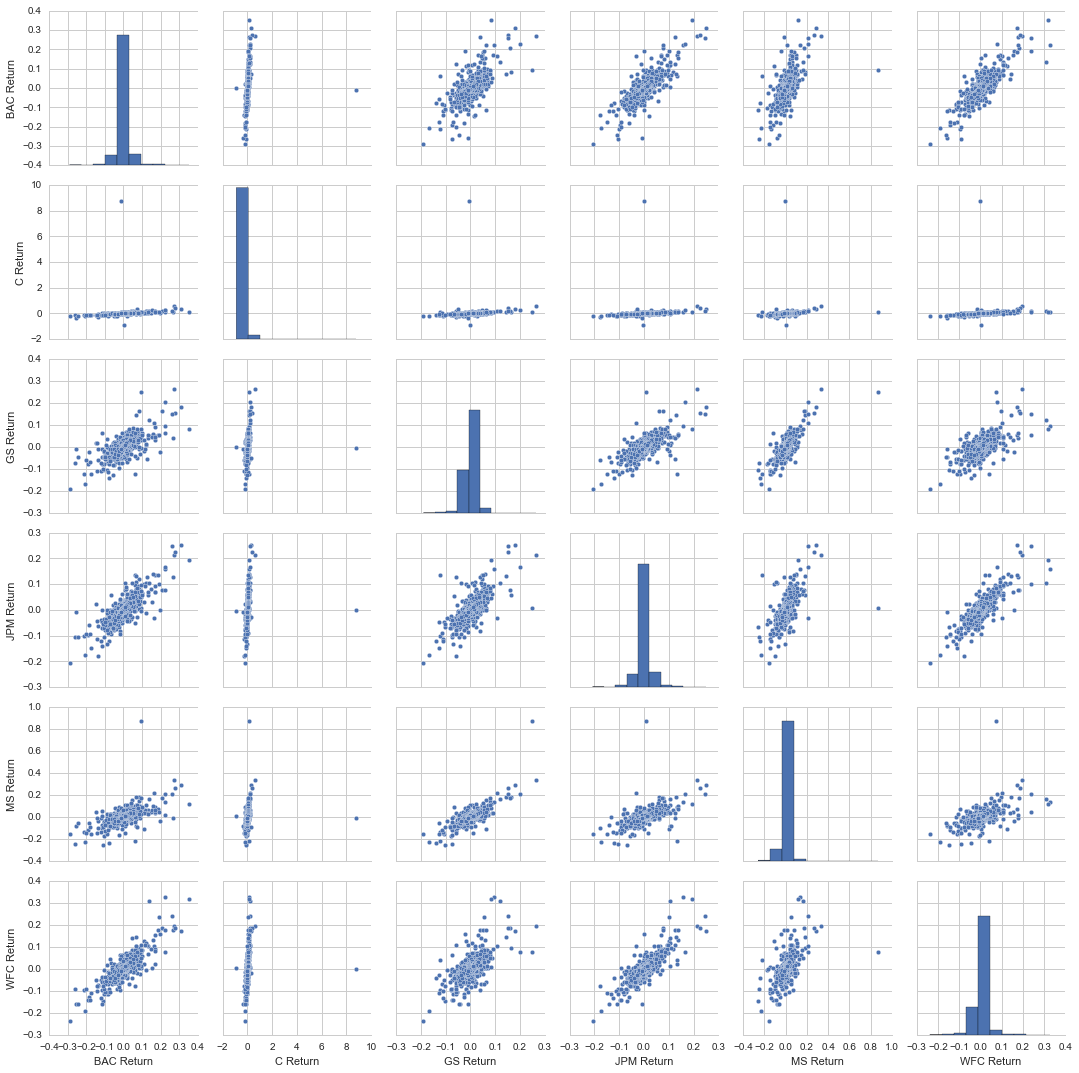

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [46]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2020-03-16
C Return     2020-03-16
GS Return    2020-03-16
JPM Return   2020-03-16
MS Return    2020-03-16
WFC Return   2020-03-12
dtype: datetime64[ns]

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [47]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2020-03-13
C Return     2020-03-13
GS Return    2020-03-13
JPM Return   2020-03-13
MS Return    2020-03-13
WFC Return   2020-03-24
dtype: datetime64[ns]

BAC Return    0.022515
C Return      0.024663
GS Return     0.020860
JPM Return    0.020490
MS Return     0.022498
WFC Return    0.024644
dtype: float64

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [49]:
returns.std() # Citigroup riskiest

BAC Return    0.022515
C Return      0.024663
GS Return     0.020860
JPM Return    0.020490
MS Return     0.022498
WFC Return    0.024644
dtype: float64

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [51]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return   NaN
C Return     NaN
GS Return    NaN
JPM Return   NaN
MS Return    NaN
WFC Return   NaN
dtype: float64

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

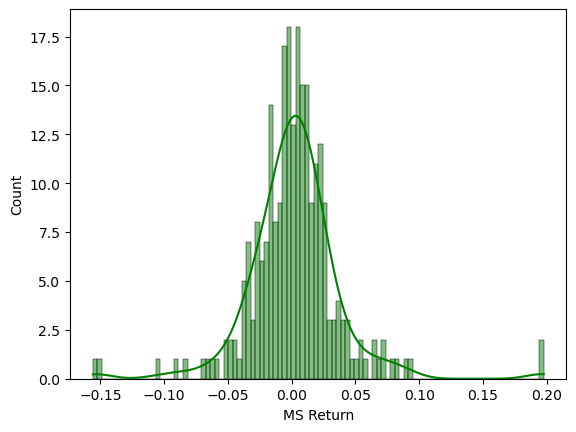

In [55]:
import seaborn as sns

# Use .loc for label-based slicing
sns.histplot(returns.loc['2020-01-01':'2020-12-31', 'MS Return'], 
             color='green', bins=100, kde=True)
plt.show()

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



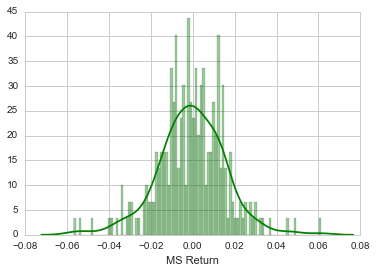

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

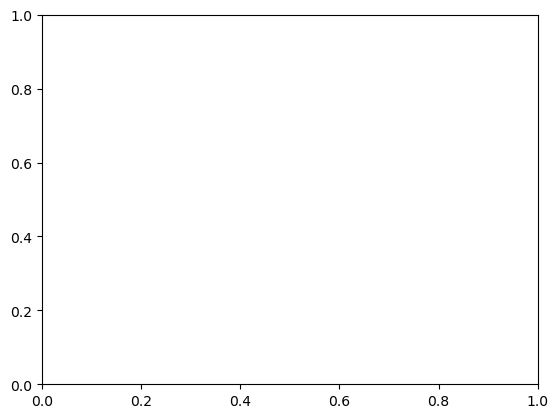

In [58]:
import seaborn as sns

# Use .loc for label-based slicing
sns.histplot(returns.loc['2008-01-01':'2008-12-31', 'MS Return'], 
             color='green', bins=100, kde=True)
plt.show()

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

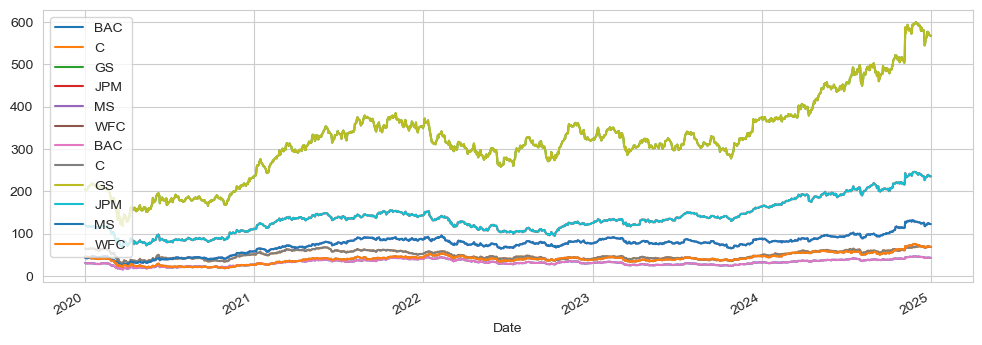

In [61]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()
plt.show()

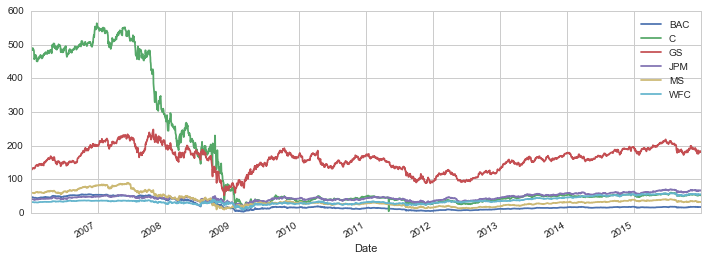

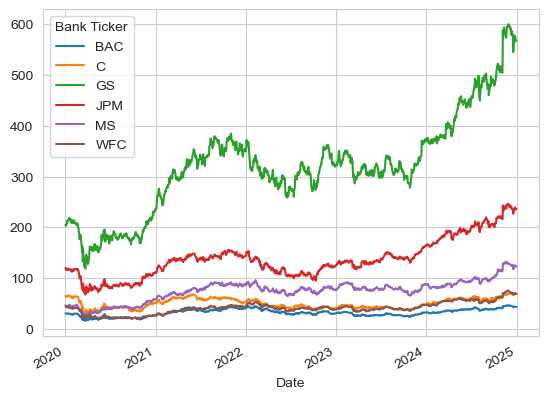

In [62]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()
plt.show()

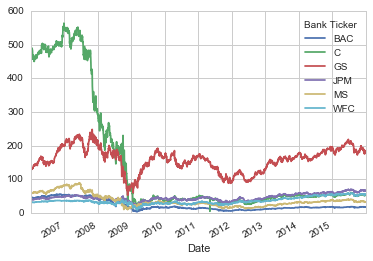

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

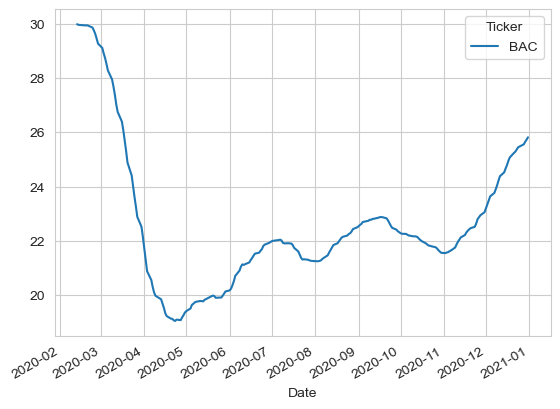

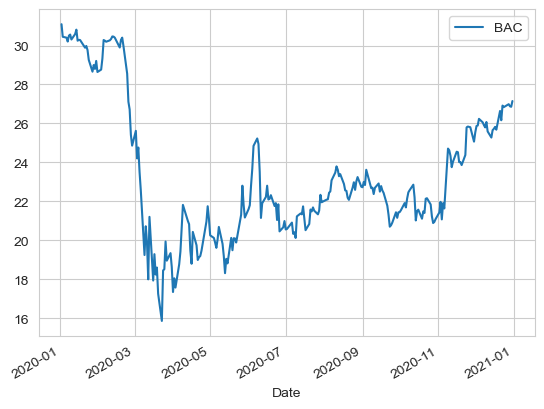

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Use .loc instead of .ix
BAC['Close'].loc['2020-01-01':'2021-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2020-01-01':'2021-01-01'].plot(label='BAC CLOSE')

plt.legend()
plt.show()


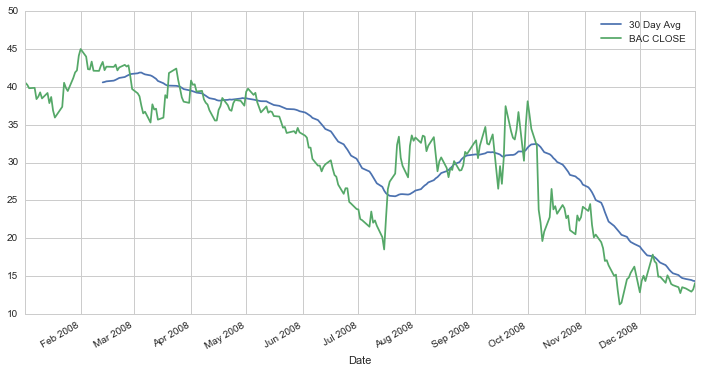

** Create a heatmap of the correlation between the stocks Close Price.**

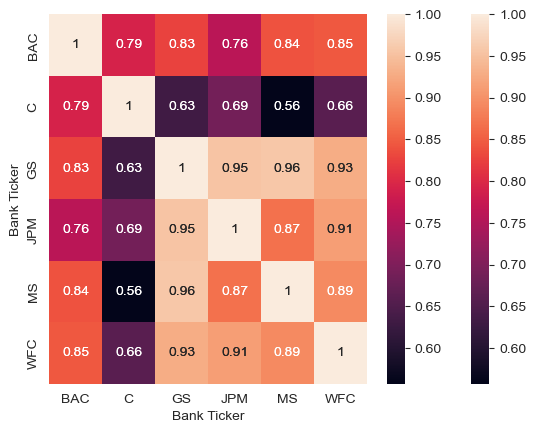

In [67]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)
plt.show()

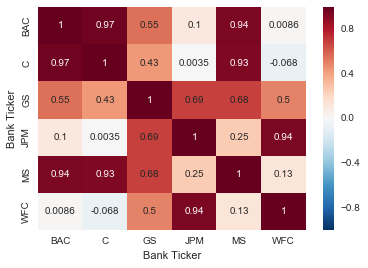

** Optional: Use seaborn's clustermap to cluster the correlations together:**

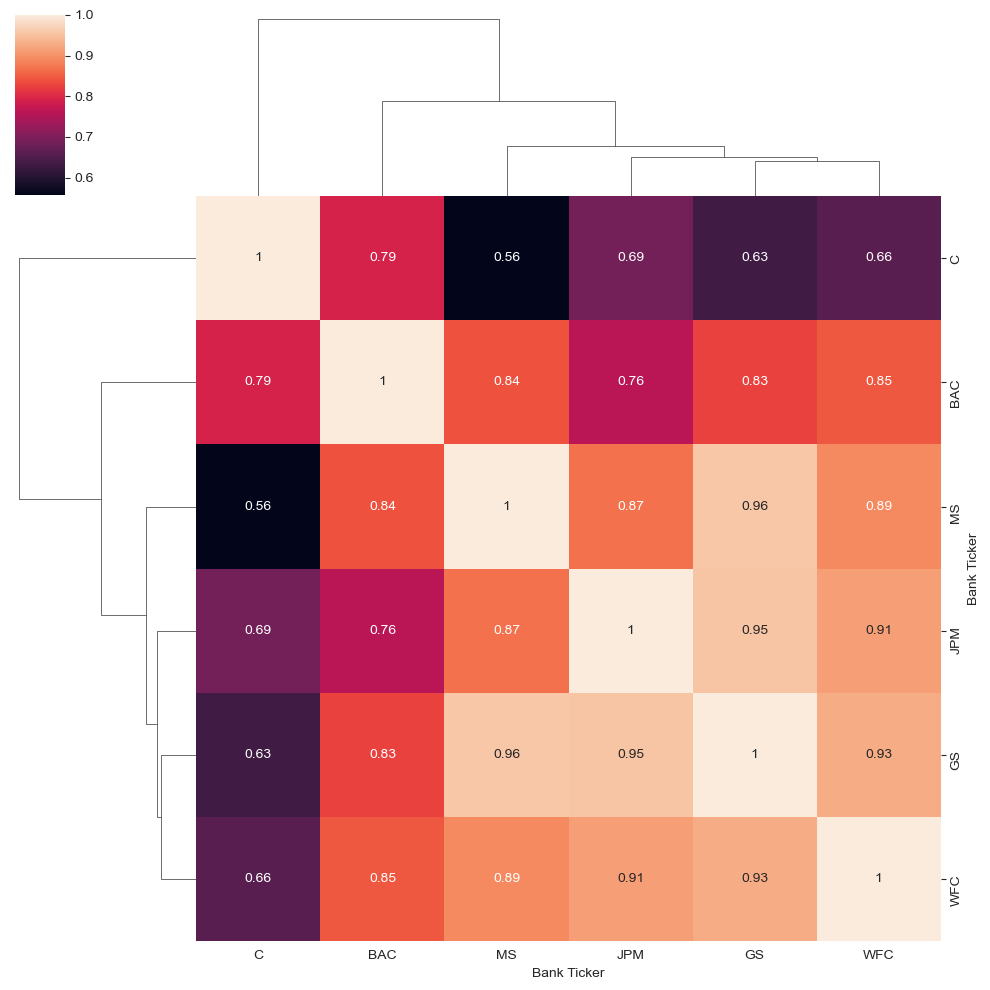

In [68]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)
plt.show()

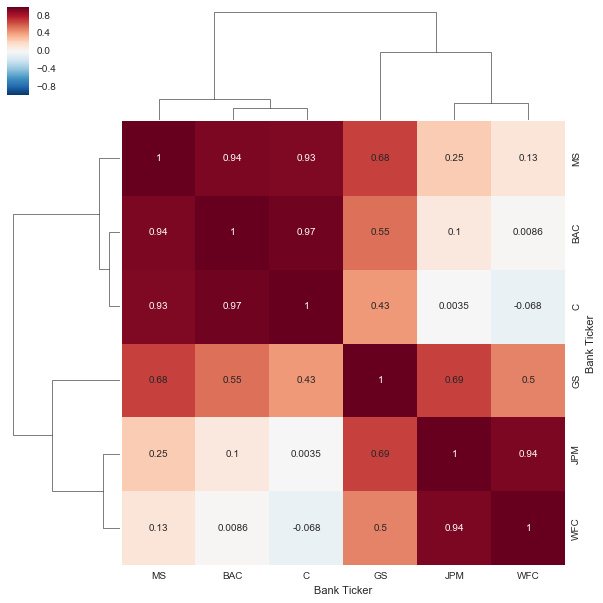

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.